# PfDA PROJECT 2
------
**Olga Knutova**
***
*This repository contains my Project 2 
for Programming for Data Analisys module
of Higher Diploma in Computing in Data Analytics course 2023
in Atlantic Technological University*

## An analysis of paleo-present climate data

***
In this project:
1. Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
2. Examine one other (paleo/modern) features - Sea Level.
3. Examine Irish context.
4. Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats.
5. For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).
6. Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue.
7. Comment on accelerated warming based on very latest features.



#### 1. Analyse CO2 vs Temperature Anomaly from 800kyrs – present.


In [1257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will have a look at data from four sourses provided to us:

-CO2 data from Luthi et al. 2008 Nature Paper[1]

-CO2 data from IPCC Report[2]

-Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC[3]

-Temperature Data from NOAA[4]

Each dataset we will have to organise fore the future analysis. 

##### CO2 data from Luthi et al. 2008 Nature Paper

This data set provide informatin on carbone dioxide concentration based on measuring the composition of air trapped in ice cores from Antarctica.
We will use Composite CO2 record (0-800 kyr BP)"


In [1258]:
#reading excel file
path='CO2 data from Luthi et al. 2008 Nature Paper .xls'
sheet_name = '3.  Composite CO2'
CO2_NP_df = pd.read_excel(path, sheet_name, skiprows=6, index_col=None)
#rename columns to be able to merge later
CO2_NP_df['year']=(1950-CO2_NP_df['EDC3_gas_a (yr)'])
CO2_NP_df.rename(columns={'CO2 (ppmv)': 'CO2_NP (ppmv)'}, inplace=True)

In [1259]:
#checking dataframe
print(CO2_NP_df.head())
print("------")
print("shape:", CO2_NP_df.shape)


   EDC3_gas_a (yr)  CO2_NP (ppmv)  year
0              137          280.4  1813
1              268          274.9  1682
2              279          277.9  1671
3              395          279.1  1555
4              404          281.9  1546
------
shape: (1096, 3)


Now we will visualise our data.

Text(0.5, 1.0, 'CO2 data from Luthi et al. 2008 Nature Paper')

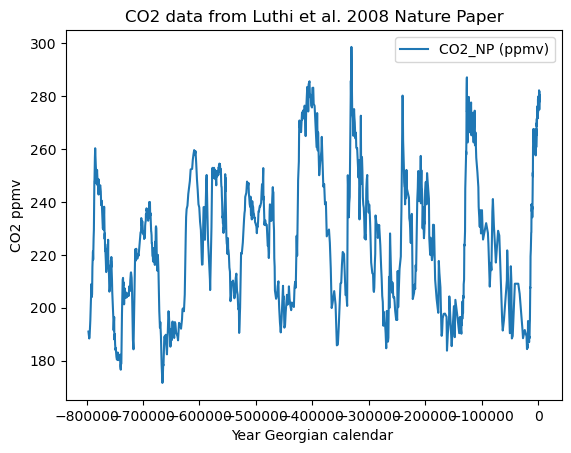

In [1260]:
x= ("year")
y= ("CO2_NP (ppmv)")
CO2_NP_df.plot(x, y)
plt.xlabel('Year Georgian calendar ')
plt.ylabel('CO2 ppmv')
plt.title('CO2 data from Luthi et al. 2008 Nature Paper')

As we can see CO2 level is changing over long period of time we can have a look at trend line.

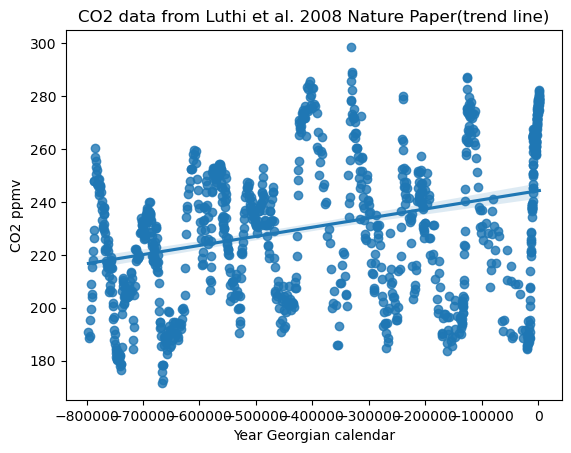

In [1261]:


sns.regplot(x="year", y="CO2_NP (ppmv)", data= CO2_NP_df)
plt.xlabel('Year Georgian calendar')
plt.ylabel('CO2 ppmv')
plt.title('CO2 data from Luthi et al. 2008 Nature Paper(trend line)')
plt.show()

The trend line analysis clearly showing encrease in CO2 level over time.

##### CO2 data from IPCC Report

This data set contains same information but from alternative sourse. 
The Intergovernmental Panel on Climate Change (IPCC) is the United Nations body for assessing the science related to climate change.

We will do same manipulations with data set.
Convert years BP to Georgian calendar, rename and reshape coulumns.



In [1262]:
path = 'CO2 data from IPCC Report .xls'
CO2_IPCC_df = pd.read_excel(path, sheet_name='CO2 Composite', skiprows=14)
CO2_IPCC_df.drop('sigma mean CO2 (ppmv)', axis=1, inplace=True)
CO2_IPCC_df['yearBP'] = CO2_IPCC_df['Gasage (yr BP) '].astype(int)
CO2_IPCC_df['year']=(1950-CO2_IPCC_df['yearBP'])
CO2_IPCC_df.rename(columns={'CO2 (ppmv)': 'CO2_IPCC (ppmv)'}, inplace=True)
CO2_IPCC_df.drop('yearBP', axis=1, inplace=True)
CO2_IPCC_df.drop('Gasage (yr BP) ', axis=1, inplace=True)

In [1263]:
print(CO2_IPCC_df.head())
print("------")
print("shape:", CO2_IPCC_df.shape)

   CO2_IPCC (ppmv)  year
0       368.022488  2001
1       361.780737  1998
2       359.647793  1996
3       357.106740  1994
4       353.946685  1993
------
shape: (1901, 2)


Text(0.5, 1.0, 'CO2 data from IPCC report')

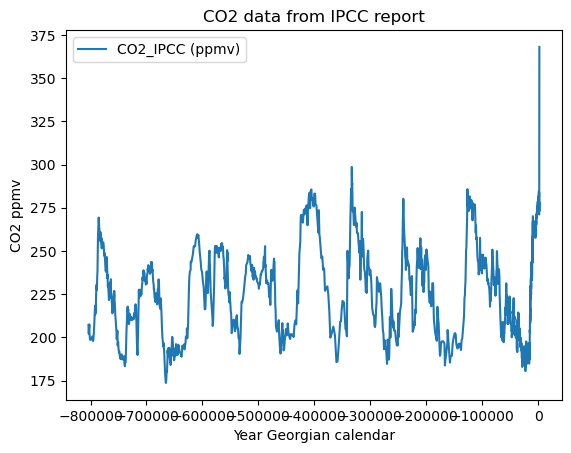

In [1264]:

CO2_IPCC_df.plot(x="year", y="CO2_IPCC (ppmv)")
plt.xlabel('Year Georgian calendar')
plt.ylabel('CO2 ppmv')
plt.title('CO2 data from IPCC report')

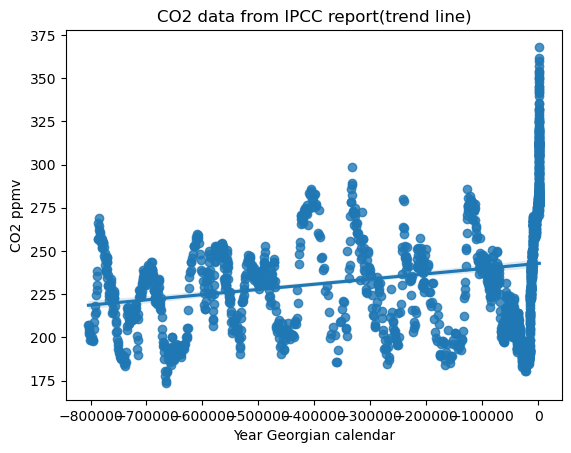

In [1265]:
sns.regplot(x="year", y="CO2_IPCC (ppmv)", data= CO2_IPCC_df)
plt.xlabel('Year Georgian calendar')
plt.ylabel('CO2 ppmv')
plt.title('CO2 data from IPCC report(trend line)')
plt.show()

We can plot data from both sourses on one axes to see if there is any difference between them.

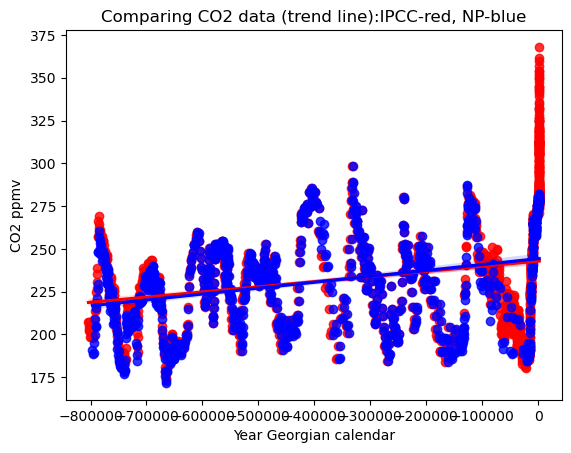

In [1266]:
fig, ax=plt.subplots()
sns.regplot(x="year", y="CO2_IPCC (ppmv)", data= CO2_IPCC_df, color='red')
sns.regplot(x="year", y="CO2_NP (ppmv)", data= CO2_NP_df, color='blue')
plt.xlabel('Year Georgian calendar')
plt.ylabel('CO2 ppmv')
plt.title('Comparing CO2 data (trend line):IPCC-red, NP-blue')
plt.show()

As we can see data from both sourses is overlaping.
The IPCC repord hase more entry point in modern time.
We can use IPCC data for future analysis.

Next we will do the same with two data sourses for the temperature.

##### Temperature Data from Jouzel 


Temperature difference from the average of the last 1000 years is recorded in Kelvin to convert to Celsius -273.15

In [1267]:
path='Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC.xls'
Temp_Jouzel_df = pd.read_excel(path)
Temp_Jouzel_df['yearBP'] = Temp_Jouzel_df['AICC2012'].astype(int)
Temp_Jouzel_df['year']=(1950-Temp_Jouzel_df['yearBP'])
Temp_Jouzel_df['temp_Jouzel_C']=(Temp_Jouzel_df['temp']-273.15)
Temp_Jouzel_df.drop('ztop', axis=1, inplace=True)
Temp_Jouzel_df.drop('bag', axis=1, inplace=True)
Temp_Jouzel_df.drop('deutfinal', axis=1, inplace=True)
Temp_Jouzel_df.drop('acc-EDC3beta', axis=1, inplace=True)
Temp_Jouzel_df.drop('EDC3béta', axis=1, inplace=True)
Temp_Jouzel_df.drop('AICC2012', axis=1, inplace=True)
Temp_Jouzel_df.drop('temp', axis=1, inplace=True)
Temp_Jouzel_df.drop('yearBP', axis=1, inplace=True)


In [1268]:
print(Temp_Jouzel_df.head())
print("------")
print("shape:", Temp_Jouzel_df.shape)

   year  temp_Jouzel_C
0  2005         -54.85
1  2000         -54.85
2  1996         -54.85
3  1991         -54.85
4  1984         -54.85
------
shape: (5819, 2)


Text(0.5, 1.0, 'Temperature Data from Jouzel')

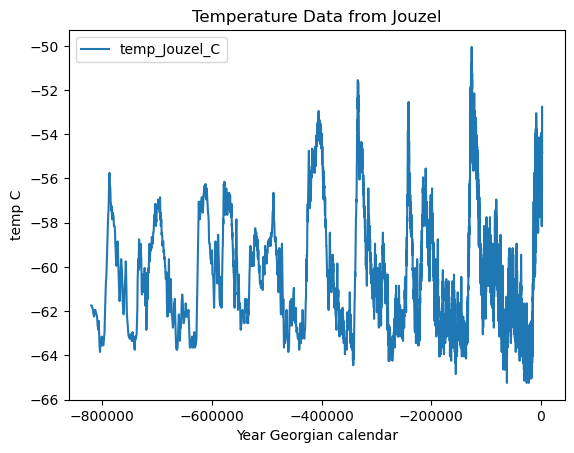

In [1269]:

Temp_Jouzel_df.plot(x="year", y="temp_Jouzel_C")
plt.xlabel('Year Georgian calendar')
plt.ylabel('temp C')
plt.title('Temperature Data from Jouzel')

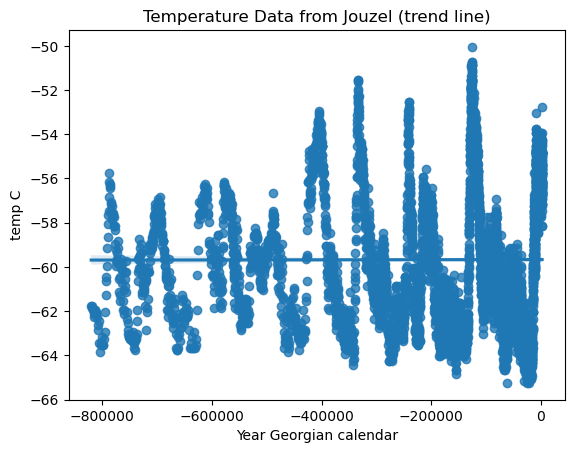

In [1270]:
sns.regplot(x="year", y="temp_Jouzel_C", data= Temp_Jouzel_df)
plt.xlabel('Year Georgian calendar')
plt.ylabel('temp C')
plt.title('Temperature Data from Jouzel (trend line)')
plt.show()

##### Temperature Data from NOAA

NOAA- National Oceanic and Atmospheric Administration

In [1271]:

Temp_NOAA_df = pd.read_csv('Temperature Data from NOAA.txt',sep='\s+', skiprows=91, index_col=None)
Temp_NOAA_df['yearBP'] = Temp_NOAA_df['Age'].astype(int)
Temp_NOAA_df['year']=(1950-Temp_NOAA_df['yearBP'])
Temp_NOAA_df.drop('Bag', axis=1, inplace=True)
Temp_NOAA_df.drop('ztop', axis=1, inplace=True)
Temp_NOAA_df.drop('Deuterium', axis=1, inplace=True)
Temp_NOAA_df.drop('Age', axis=1, inplace=True)
Temp_NOAA_df.drop('yearBP', axis=1, inplace=True)
Temp_NOAA_df.rename(columns={'Temperature': 'temp_NOAA'}, inplace=True)
Temp_NOAA_df.dropna(subset=['temp_NOAA'], inplace=True)

In [1272]:
print(Temp_NOAA_df.head())
print("------")
print("shape:", Temp_NOAA_df.shape)

    temp_NOAA  year
12       0.88  1912
13       1.84  1904
14       3.04  1895
15       0.35  1886
16      -0.42  1877
------
shape: (5785, 2)


Text(0.5, 1.0, 'Temperature Data from NOAA')

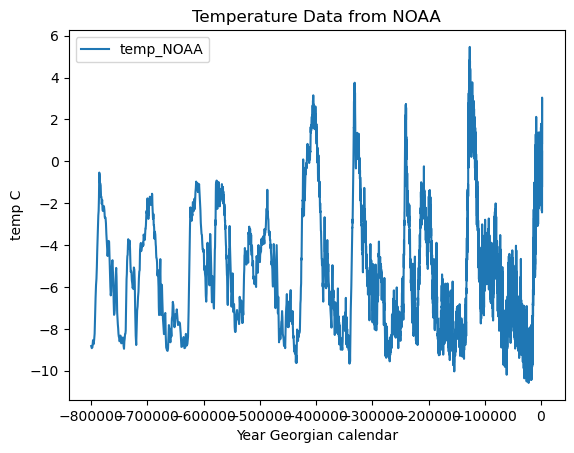

In [1273]:
Temp_NOAA_df.plot(x="year", y="temp_NOAA")
plt.xlabel('Year Georgian calendar')
plt.ylabel('temp C')
plt.title('Temperature Data from NOAA')

Text(0.5, 1.0, 'Temperature Data from NOAA (trend line)')

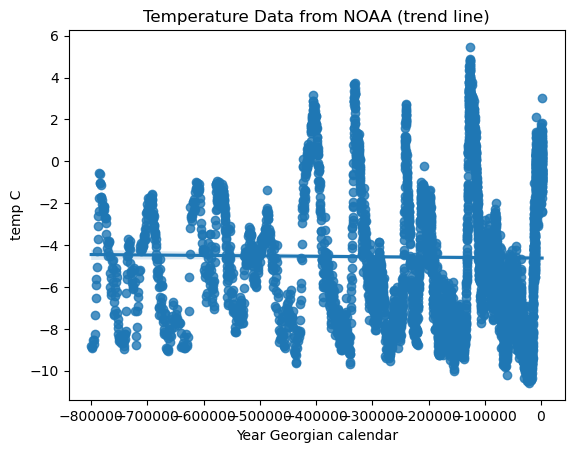

In [1274]:
sns.regplot(x="year", y="temp_NOAA", data= Temp_NOAA_df)
plt.xlabel('Year Georgian calendar')
plt.ylabel('temp C')
plt.title('Temperature Data from NOAA (trend line)')

Examening two sets of temperature data we can notice that even with temperature in Antarctica vary over the time there is no significant change in a trend line.
Let's put it on one axes to have a better look.

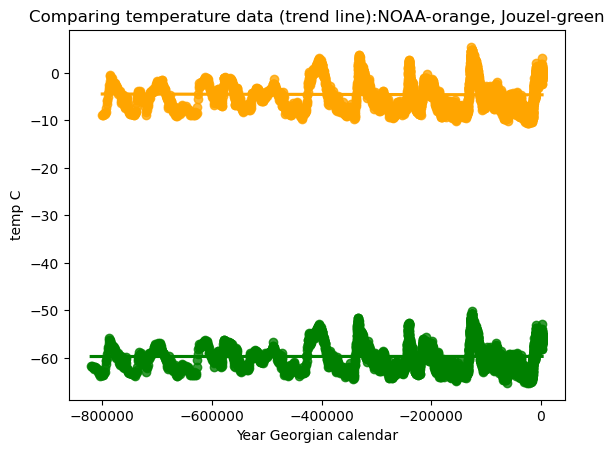

In [1275]:
fig, ax=plt.subplots()
sns.regplot(x="year", y="temp_NOAA", data= Temp_NOAA_df, color='orange')
sns.regplot(x="year", y="temp_Jouzel_C", data= Temp_Jouzel_df, color='green')
plt.xlabel('Year Georgian calendar')
plt.ylabel('temp C')
plt.title('Comparing temperature data (trend line):NOAA-orange, Jouzel-green')
plt.show()

It looks like temperature data from both sourses is very similar. 
we can move bouth grafs closer to confirm similarity.

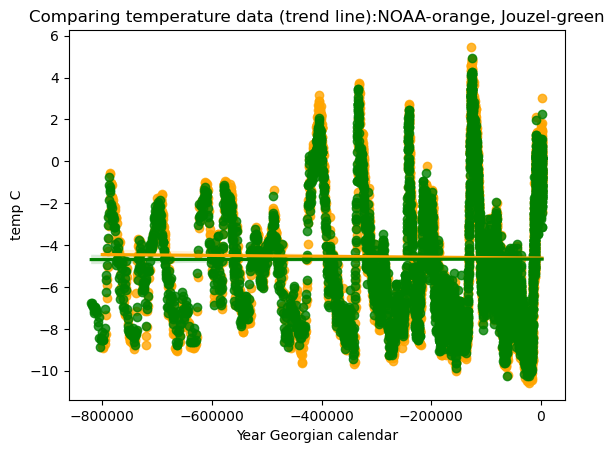

In [1276]:
fig, ax=plt.subplots()
sns.regplot(x="year", y="temp_NOAA", data= Temp_NOAA_df, color='orange')
Temp_Jouzel_df['temp_Jouzel_C_adj']=(55+Temp_Jouzel_df['temp_Jouzel_C'])
sns.regplot(x="year", y="temp_Jouzel_C_adj", data= Temp_Jouzel_df, color='green')
plt.xlabel('Year Georgian calendar')
plt.ylabel('temp C')
plt.title('Comparing temperature data (trend line):NOAA-orange, Jouzel-green')
plt.show()

After looking into four data sets we can say that pairs of CO2 and temperature data are very similar. 
Changes in CO2 level are more significant than temperature over time from 800kyrs  to present.

#### 2. Examine one other (paleo/modern) features - Sea 

Global Average Absolute Sea Level Change, 1880-2021 [5]




We will have a look at how sea level was changing from 1880 to 2021


Units: inches,,,,

In [1277]:
url= 'sea-level_fig-1.csv'
sea_level_df=pd.read_csv(url ,skiprows=6)
sea_level_df.rename(columns={'Year': 'year'}, inplace=True)

In [1278]:
print(sea_level_df.head())
print("------")
print("shape:", sea_level_df.shape)

   year  CSIRO - Adjusted sea level (inches)  \
0  1880                             0.000000   
1  1881                             0.220472   
2  1882                            -0.440945   
3  1883                            -0.232283   
4  1884                             0.590551   

   CSIRO - Lower error bound (inches)  CSIRO - Upper error bound (inches)  \
0                           -0.952756                            0.952756   
1                           -0.732283                            1.173228   
2                           -1.346457                            0.464567   
3                           -1.129921                            0.665354   
4                           -0.283465                            1.464567   

   NOAA - Adjusted sea level (inches)  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  
------
s

Text(0.5, 1.0, 'Global Average Absolute Sea Level Change')

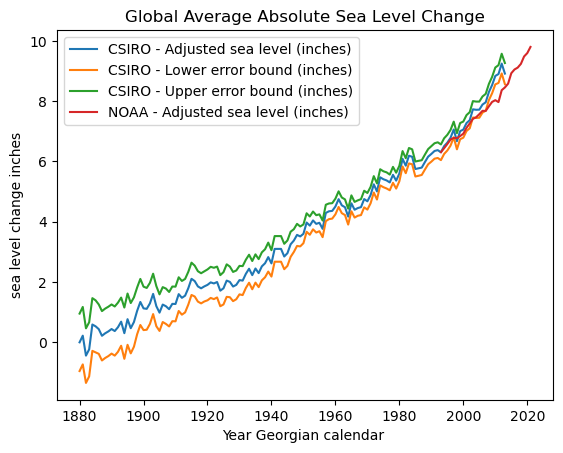

In [1279]:

df = sea_level_df.set_index('year')
df.plot()
plt.xlabel('Year Georgian calendar ')
plt.ylabel('sea level change inches')
plt.title('Global Average Absolute Sea Level Change')

As we can clerly see over last fwe centuries sea level steady incresing.
lets have a look at paleo data.

Global Sea Level Reconstruction using Stacked Records from 0-800 ka [6]

In [1280]:

sea_level_NOAA_df = pd.read_csv('sea-level 800000-3000.txt',sep='\s+', skiprows=95, index_col=False)
sea_level_NOAA_df.drop('age_calkaBP', axis=1, inplace=True)
sea_level_NOAA_df['year']=(1950+sea_level_NOAA_df['SeaLev_shortPC1']*1000)
sea_level_NOAA_df.dropna(subset=['year'], inplace=True)
sea_level_NOAA_df['year'] = sea_level_NOAA_df['year'].astype(int)
sea_level_NOAA_df.drop('SeaLev_shortPC1_err_up', axis=1, inplace=True)
sea_level_NOAA_df.drop('SeaLev_shortPC1', axis=1, inplace=True)
sea_level_NOAA_df.drop('SeaLev_shortPC1_err_sig', axis=1, inplace=True)
sea_level_NOAA_df.drop('SeaLev_shortPC1_err_lo', axis=1, inplace=True)
sea_level_NOAA_df.drop('SeaLev_longPC1_err_lo', axis=1, inplace=True)
sea_level_NOAA_df.drop('SeaLev_longPC1_err_up', axis=1, inplace=True)
sea_level_NOAA_df.drop('SeaLev_longPC1_err_sig', axis=1, inplace=True)

sea_level_NOAA_df.sort_values(by='year', inplace=True)


In [1281]:
print(sea_level_NOAA_df.head())
print("------")
print("shape:", sea_level_NOAA_df.shape)

     SeaLev_longPC1    year
24          -130.00 -128050
23          -128.71 -126770
25          -124.87 -124940
22          -125.91 -123870
136         -124.50 -122000
------
shape: (431, 2)


Text(0.5, 1.0, 'Global Sea Level Reconstruction using Stacked Records from 0-800 ka')

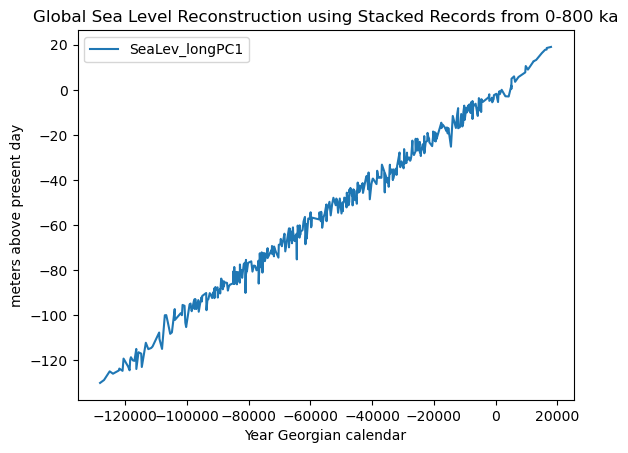

In [1318]:
df = sea_level_NOAA_df.set_index('year')
df.plot()
plt.xlabel('Year Georgian calendar')
plt.ylabel('meters above present day')
plt.title('Global Sea Level Reconstruction using Stacked Records from 0-800 ka')

As we can see the sea level is constantly rising.

#### 3. Examine Irish context

o Climate change signals: (see Maynooth study: The emergence of a climate change 
signal in long-term Irish meteorological observations - ScienceDirect)


Composite Rainfall Time Series from 1711-2016 for Ireland
"A continuous 305-year (1711-2016) monthly rainfall series has been created for the Island of Ireland using two key data sources, i) a previously unpublished UK Meteorological Office Note which contains annual rainfall anomalies and corresponding proportional monthly totals based on weather diaries and early observational records for the period 1711-1977 and, ii) a long-term, homogenised monthly rainfall series for the island for the period 1850-2016." https://www.met.ie/climate/available-data/long-term-data-sets/#MonthlyIIP

https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/joc.4522

In [1283]:
url='Composite Rainfall Time Series from 1711-2016 for Ireland.CSV'
irish_rainfall_df=pd.read_csv(url)
irish_rainfall_df['Date'] = pd.to_datetime(irish_rainfall_df[['Year','Month']].assign(DAY=1))
irish_rainfall_df.drop('Year', axis=1, inplace=True)
irish_rainfall_df.drop('Month', axis=1, inplace=True)

In [1284]:
print(irish_rainfall_df.head())
print("------")
print("shape:", irish_rainfall_df.shape)

   Median montly series       Date
0                  16.4 1711-01-01
1                  73.1 1711-02-01
2                 121.2 1711-03-01
3                  85.2 1711-04-01
4                  66.6 1711-05-01
------
shape: (3672, 2)


<AxesSubplot:xlabel='Date'>

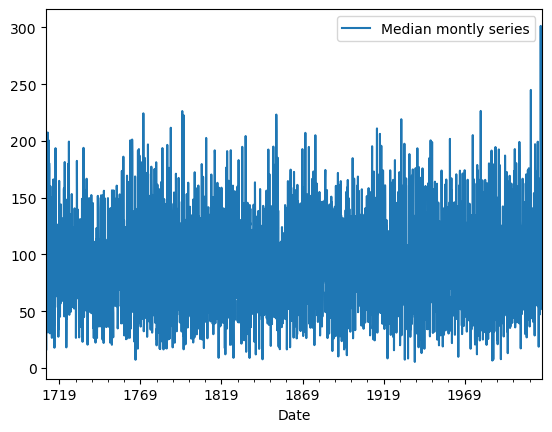

In [1285]:
irish_rainfall_df.plot(x="Date", y="Median montly series")

In [1286]:
rain_mean_year=irish_rainfall_df.groupby(pd.PeriodIndex(irish_rainfall_df['Date'], freq="Y"))['Median montly series'].mean()

<AxesSubplot:xlabel='Date'>

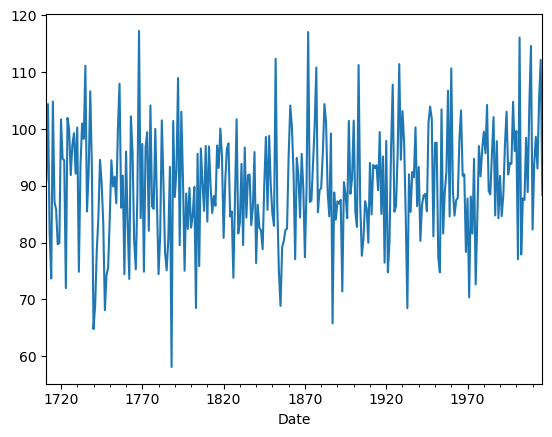

In [1287]:
rain_mean_year.plot(x="Date")

In [1288]:
from sklearn.linear_model import LinearRegression
x = irish_rainfall_df['Date'].values.reshape(-1, 1) # predictor variable
y = irish_rainfall_df['Median montly series'].values # response variable
model = LinearRegression().fit(x, y)


Phoenix Park Dublin
i. Phoenix Park Dublin_1831-1958.CSV
 Once daily observations.
IRELAND LONG-TERM MAXIMUM AND MINIMUM AIR TEMPERATURE 
DATASET (ILMMT)
DATASET INFORMATION
If using this dataset please cite:
Mateus, C., Potito, A., Curley, M. 2020. Reconstruction of a long-term historical daily 
maximum and minimum air temperature network dataset for Ireland (1831-1968). 
Geoscience Data Journal. 00:1–14. https://doi.org/10.1002/gdj3.92

https://rmets.onlinelibrary.wiley.com/doi/10.1002/gdj3.92

In [1289]:
url='Phoenix Park Dublin_1831-1958.csv'
irish_temp_df=pd.read_csv(url)
irish_temp_df['Date'] = pd.to_datetime(irish_temp_df[['Year','Month','Day']])
irish_temp_df.drop('Year', axis=1, inplace=True)
irish_temp_df.drop('Month', axis=1, inplace=True)
irish_temp_df.drop('Day', axis=1, inplace=True)
irish_temp_df.drop('Max (F)', axis=1, inplace=True)
irish_temp_df.drop('Min (F)', axis=1, inplace=True)

In [1290]:
print(irish_temp_df.head())
print("------")
print("shape:", irish_temp_df.shape)
display(irish_temp_df)

   Max (C)  Min (C)       Date
0      NaN      NaN 1831-01-01
1      NaN      NaN 1831-01-02
2      NaN      NaN 1831-01-03
3      NaN      NaN 1831-01-04
4      NaN      NaN 1831-01-05
------
shape: (46751, 3)


,Max (C),Min (C),Date
0,NaN,NaN,1831-01-01
1,NaN,NaN,1831-01-02
2,NaN,NaN,1831-01-03
3,NaN,NaN,1831-01-04
4,NaN,NaN,1831-01-05
...,...,...,...
46746,12.0,7.1,1958-12-27
46747,12.2,5.2,1958-12-28
46748,8.6,3.2,1958-12-29
46749,9.1,3.9,1958-12-30


<AxesSubplot:xlabel='Date'>

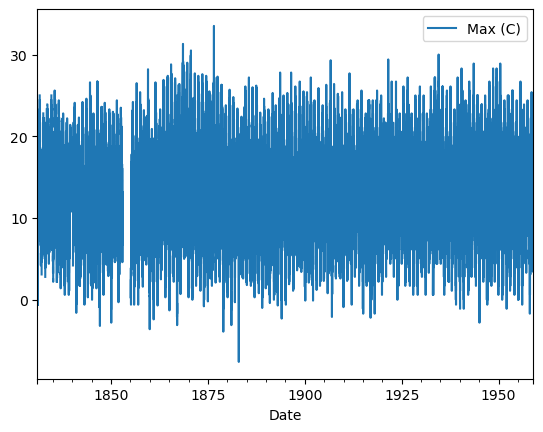

In [1291]:

irish_temp_df.plot(x="Date", y="Max (C)")

In [1292]:
mean_year=irish_temp_df.groupby(pd.PeriodIndex(irish_temp_df['Date'], freq="Y"))['Max (C)'].mean()

<AxesSubplot:xlabel='Date'>

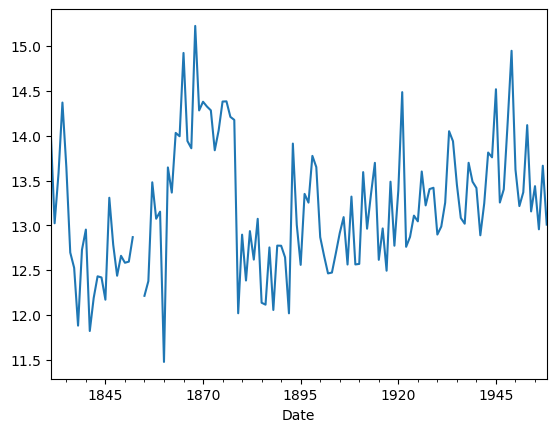

In [1293]:
mean_year.plot(x="Date")

In [1294]:
august_data = irish_temp_df.loc[(irish_temp_df['Date'].dt.month == 1)]

<AxesSubplot:xlabel='Date'>

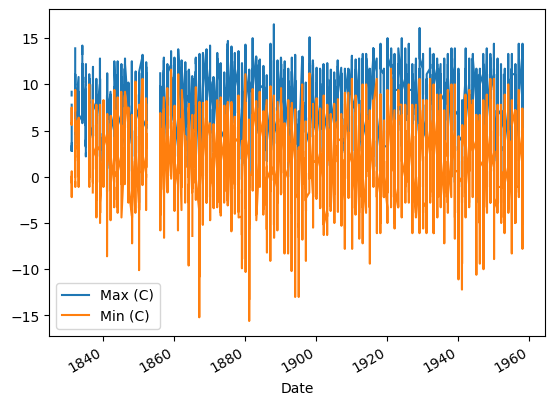

In [1295]:
august_data.plot(x="Date")

In [1296]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
#df = pd.read_csv('GlobalTemperatures.csv')

# Extract the year and the temperature columns
#irish_temp_df['Date'] = pd.DatetimeIndex(irish_temp_df['Date']).year
#irish_temp_df = irish_temp_df[['Date', 'Max (C)']]

# Drop missing values
#df = df.dropna()

# Group by year and calculate the mean temperature
#irish_temp_df = irish_temp_df.groupby('Date').mean().reset_index()

# Split the data into train and test sets
#train = irish_temp_df[irish_temp_df['Date'] <= 1900]
#test = irish_temp_df[irish_temp_df['Date'] > 1900]

# Define the features and the target
#X_train = train['Date'].values.reshape(-1, 1)
#y_train = train['Max (C)'].values
#X_test = test['Date'].values.reshape(-1, 1)
#y_test = test['Max (C)'].values

# Create and fit the linear regression model
#model = LinearRegression()
#model.fit(X_train, y_train)

# Make predictions on the test set
#y_pred = model.predict(X_test)

# Evaluate the model performance
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#r2 = r2_score(y_test, y_pred)
#print('Mean Squared Error:', mse)
#print('Root Mean Squared Error:', rmse)
#print('R2 Score:', r2)

# Plot the actual and predicted values
#plt.scatter(X_test, y_test, color='blue', label='Actual')
#plt.plot(X_test, y_pred, color='red', label='Predicted')
#plt.xlabel('Year')
#plt.ylabel('Temperature (Celsius)')
#plt.title('Linear Regression Model')
#plt.legend()
#plt.show()

# Predict the temperature for the next 20 years
#X_future = np.arange(2016, 2036).reshape(-1, 1)
#y_future = model.predict(X_future)

# Plot the future predictions
#plt.plot(X_future, y_future, color='green', label='Future')
#plt.xlabel('Year')
#plt.ylabel('Temperature (Celsius)')
#plt.title('Linear Regression Model')
#plt.legend()
#plt.show()

www.met.ie/cms/assets/uploads/2023/12//LongTermTemperatures_1900_2022_annual.csv

In [1297]:

met_ie_temp_df=pd.read_csv('LongTermTemperatures_1900-2022_annual.csv')

In [1298]:
print(met_ie_temp_df.head())
print("------")
print("shape:", met_ie_temp_df.shape)

   year  Annual
0  2022    10.9
1  2021    10.5
2  2020    10.4
3  2019    10.5
4  2018    10.3
------
shape: (123, 2)


<AxesSubplot:xlabel='year'>

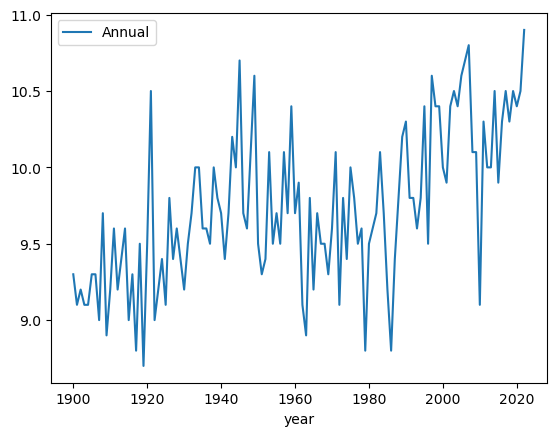

In [1299]:
met_ie_temp_df.plot(x="year", y="Annual")

#### 4. Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats


In [1300]:

CO2_merge_df= pd.merge(CO2_NP_df, CO2_IPCC_df, on="year", how="outer")
temp_merge_df= pd.merge(Temp_NOAA_df, Temp_Jouzel_df, on="year", how="outer")
merge_CO2_temp_df= pd.merge(CO2_merge_df, temp_merge_df, on="year", how="outer")
all_CO2_temp_sealev_df=pd.merge(merge_CO2_temp_df, sea_level_NOAA_df, on="year", how="outer")
#all_CO2_temp_sealev_df['year'] = pd.to_datetime(all_CO2_temp_sealev_df['year'], format='%y')

In [1301]:
print(all_CO2_temp_sealev_df.head(),)
print("------")
print("shape:", all_CO2_temp_sealev_df.shape)
display(all_CO2_temp_sealev_df)

   EDC3_gas_a (yr)  CO2_NP (ppmv)  year  CO2_IPCC (ppmv)  temp_NOAA  \
0            137.0          280.4  1813              NaN        NaN   
1            268.0          274.9  1682       276.659668        NaN   
2            279.0          277.9  1671              NaN        NaN   
3            395.0          279.1  1555              NaN      -0.47   
4            404.0          281.9  1546              NaN        NaN   

   temp_Jouzel_C  temp_Jouzel_C_adj  SeaLev_longPC1  
0            NaN                NaN             NaN  
1            NaN                NaN             NaN  
2            NaN                NaN             NaN  
3            NaN                NaN             NaN  
4            NaN                NaN             NaN  
------
shape: (14742, 8)


,EDC3_gas_a (yr),CO2_NP (ppmv),year,CO2_IPCC (ppmv),temp_NOAA,temp_Jouzel_C,temp_Jouzel_C_adj,SeaLev_longPC1
0,137.0,280.4,1813,NaN,NaN,NaN,NaN,NaN
1,268.0,274.9,1682,276.659668,NaN,NaN,NaN,NaN
2,279.0,277.9,1671,NaN,NaN,NaN,NaN,NaN
3,395.0,279.1,1555,NaN,-0.47,NaN,NaN,NaN
4,404.0,281.9,1546,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
14737,NaN,NaN,14960,NaN,NaN,NaN,NaN,16.30
14738,NaN,NaN,16000,NaN,NaN,NaN,NaN,17.75
14739,NaN,NaN,16510,NaN,NaN,NaN,NaN,17.86
14740,NaN,NaN,16540,NaN,NaN,NaN,NaN,18.54


In [1302]:
#df[['CO2_NP (ppmv)', 'CO2_IPCC (ppmv)','temp_NOAA','temp_Jouzel_C_adj']].plot()
#df = merge_df.set_index('year')
#df.plot()


In [1303]:
#merge_csv_data = merge_df.to_csv('merge.csv', index = True)
all_CO2_temp_sealev_df.to_csv('merge_all.csv', index=False)




In [1304]:
#merge_df.to_json('merge.json')

#### 5. For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).


<AxesSubplot:xlabel='year'>

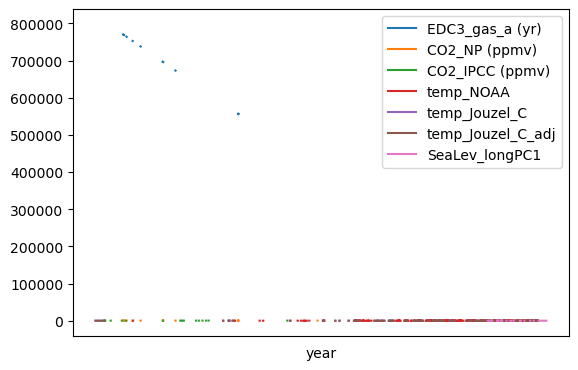

In [1317]:

df = all_CO2_temp_sealev_df.set_index('year')
df.plot()

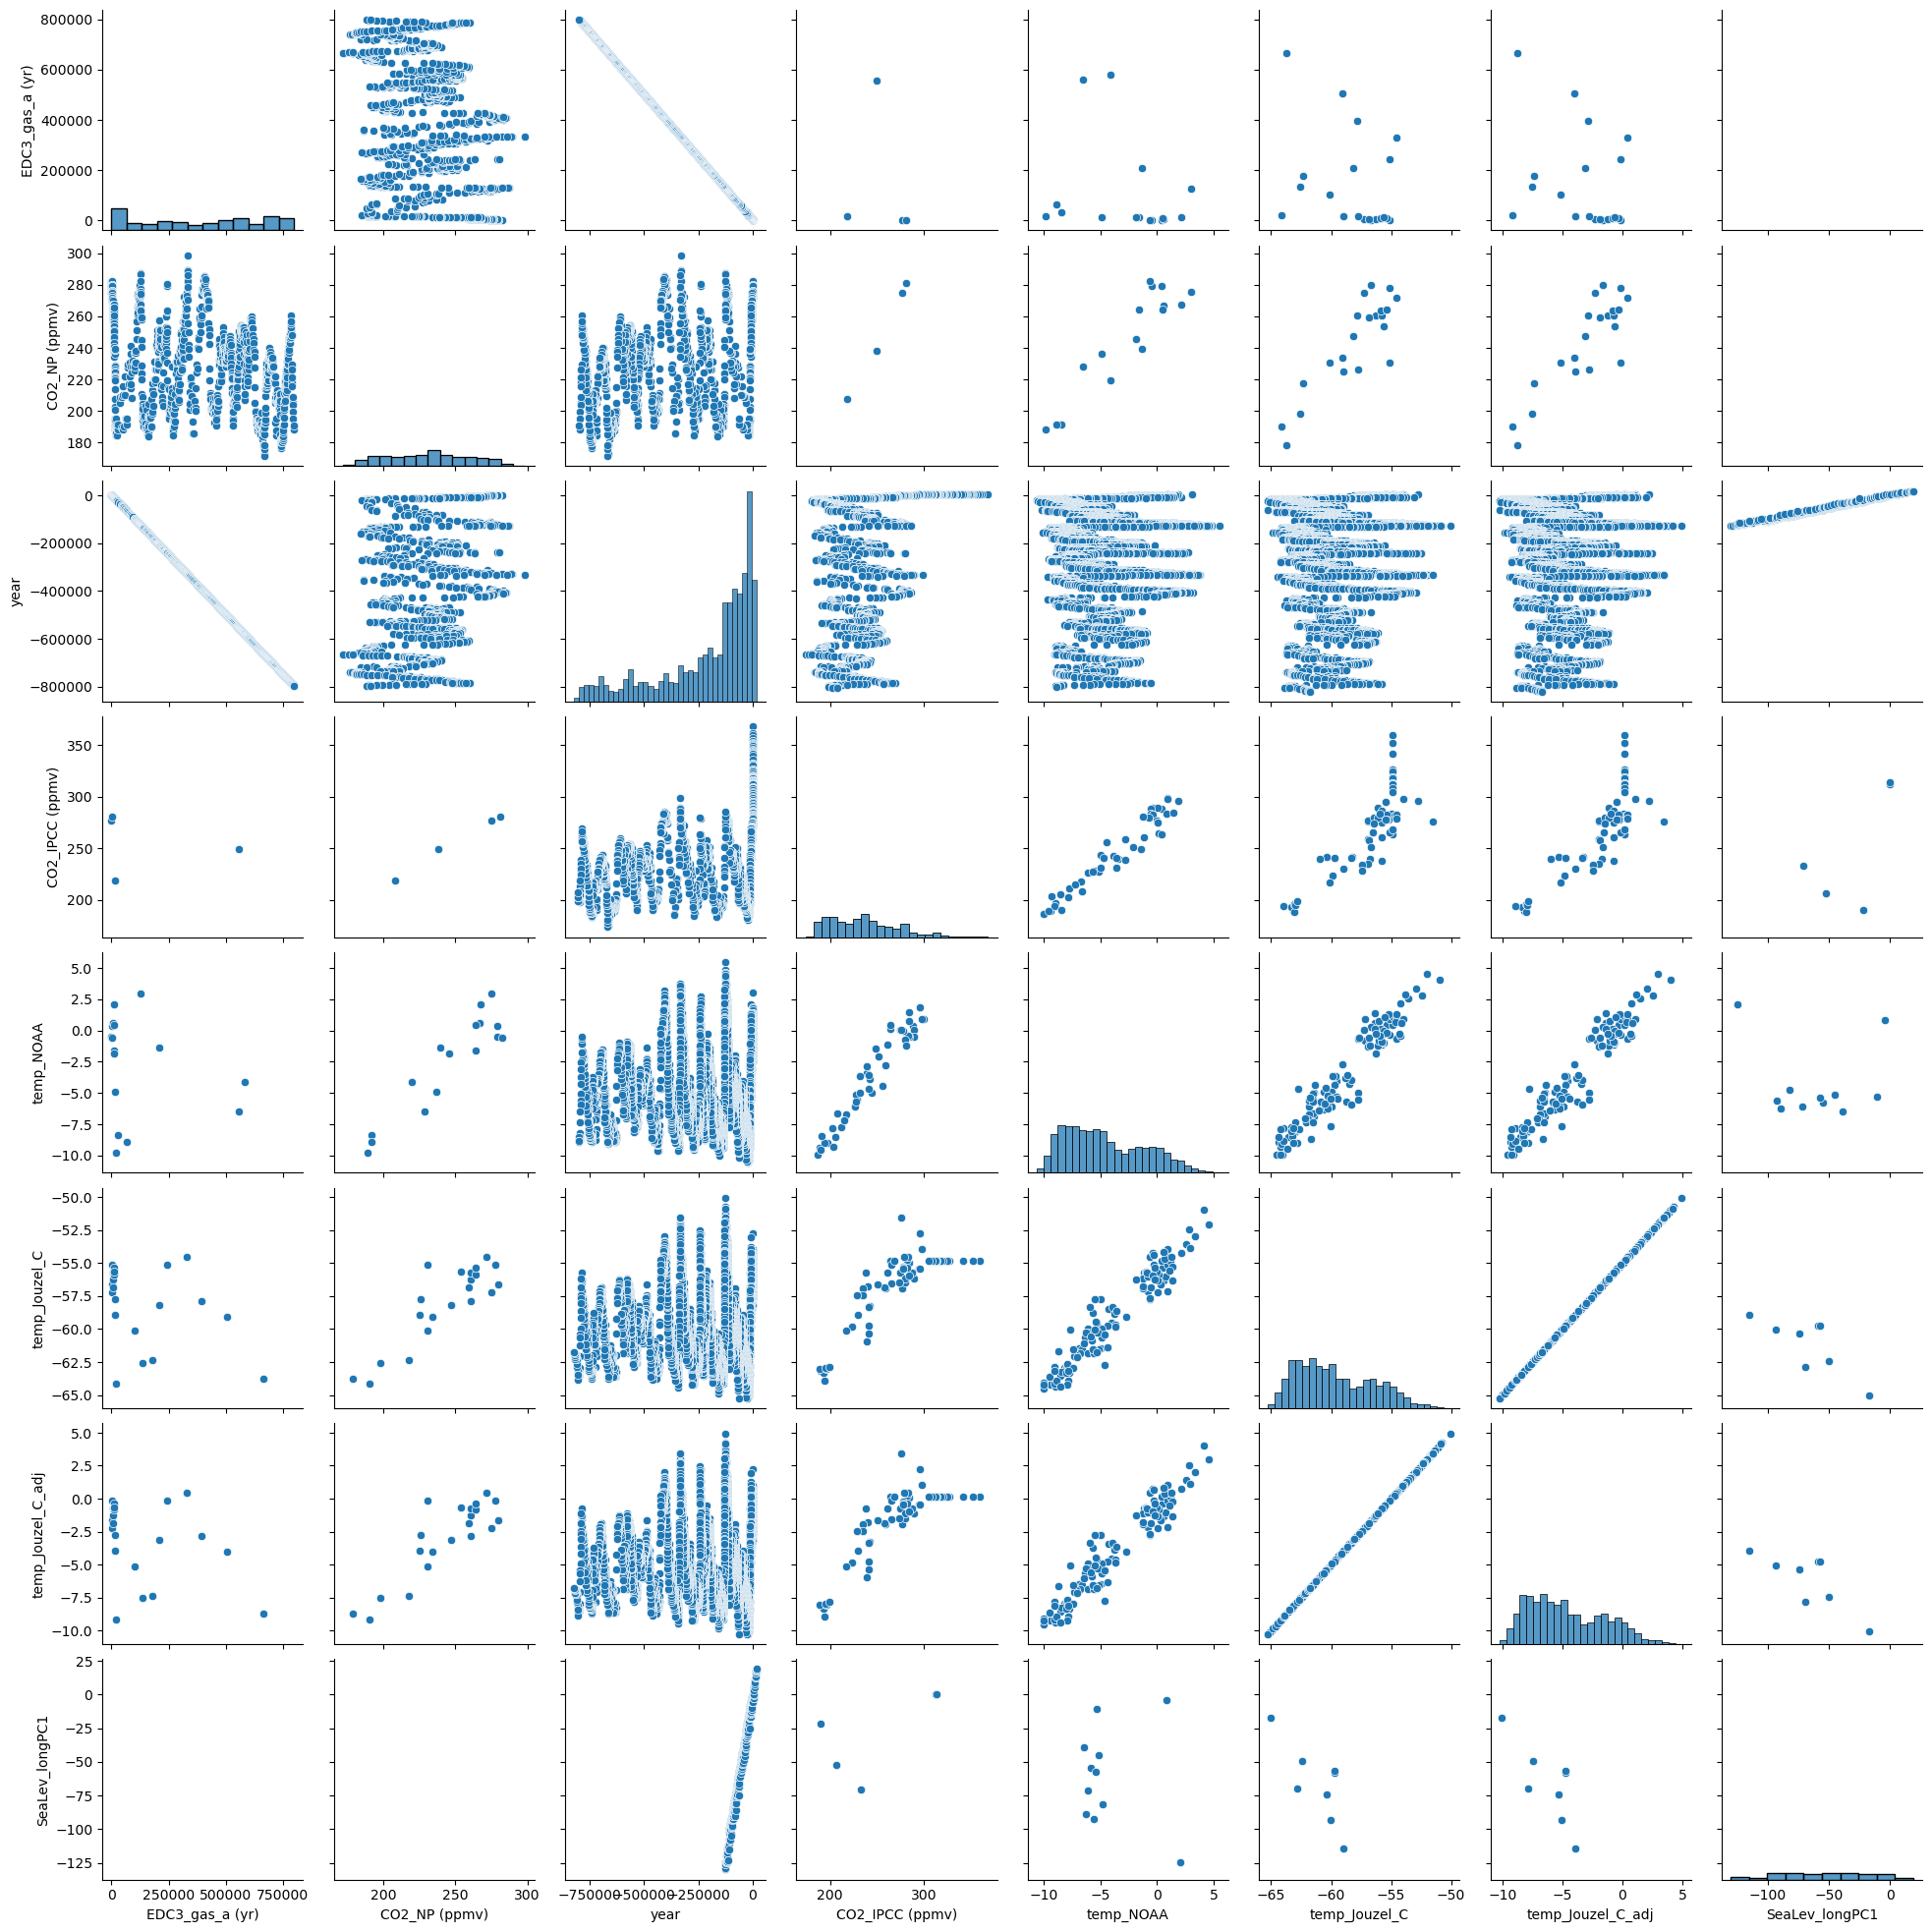

In [1306]:
pairplot = sns.pairplot(all_CO2_temp_sealev_df)
plt.show()

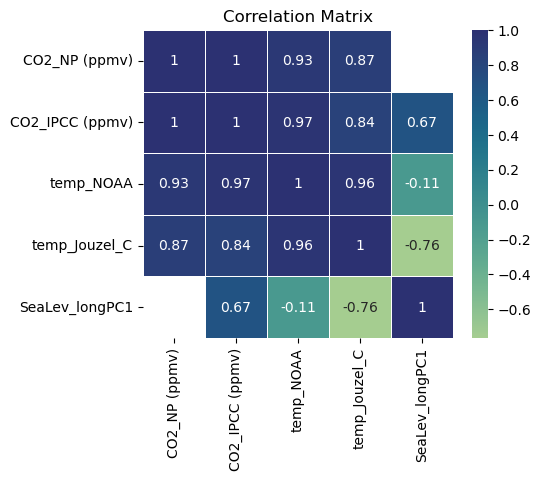

In [1307]:
columns_to_plot = ['CO2_NP (ppmv)',  'CO2_IPCC (ppmv)',  'temp_NOAA',  'temp_Jouzel_C','SeaLev_longPC1']

heatmap_df = all_CO2_temp_sealev_df[columns_to_plot]

correlation_matrix = heatmap_df.corr()


plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [1308]:
#all_CO2_temp_sealev_df['year'] = pd.to_datetime(all_CO2_temp_sealev_df['year'],format='%Y')

In [1309]:
all_CO2_temp_sealev_df['year'] = pd.to_datetime(all_CO2_temp_sealev_df['year'])
#all_CO2_temp_sealev_df['year'] = pd.DatetimeIndex(all_CO2_temp_sealev_df['year']).year

In [1310]:
print(all_CO2_temp_sealev_df.head())
print("------")
print("shape:", all_CO2_temp_sealev_df.shape)
display(all_CO2_temp_sealev_df)

   EDC3_gas_a (yr)  CO2_NP (ppmv)                          year  \
0            137.0          280.4 1970-01-01 00:00:00.000001813   
1            268.0          274.9 1970-01-01 00:00:00.000001682   
2            279.0          277.9 1970-01-01 00:00:00.000001671   
3            395.0          279.1 1970-01-01 00:00:00.000001555   
4            404.0          281.9 1970-01-01 00:00:00.000001546   

   CO2_IPCC (ppmv)  temp_NOAA  temp_Jouzel_C  temp_Jouzel_C_adj  \
0              NaN        NaN            NaN                NaN   
1       276.659668        NaN            NaN                NaN   
2              NaN        NaN            NaN                NaN   
3              NaN      -0.47            NaN                NaN   
4              NaN        NaN            NaN                NaN   

   SeaLev_longPC1  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
------
shape: (14742, 8)


,EDC3_gas_a (yr),CO2_NP (ppmv),year,CO2_IPCC (ppmv),temp_NOAA,temp_Jouzel_C,temp_Jouzel_C_adj,SeaLev_longPC1
0,137.0,280.4,1970-01-01 00:00:00.000001813,NaN,NaN,NaN,NaN,NaN
1,268.0,274.9,1970-01-01 00:00:00.000001682,276.659668,NaN,NaN,NaN,NaN
2,279.0,277.9,1970-01-01 00:00:00.000001671,NaN,NaN,NaN,NaN,NaN
3,395.0,279.1,1970-01-01 00:00:00.000001555,NaN,-0.47,NaN,NaN,NaN
4,404.0,281.9,1970-01-01 00:00:00.000001546,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
14737,NaN,NaN,1970-01-01 00:00:00.000014960,NaN,NaN,NaN,NaN,16.30
14738,NaN,NaN,1970-01-01 00:00:00.000016000,NaN,NaN,NaN,NaN,17.75
14739,NaN,NaN,1970-01-01 00:00:00.000016510,NaN,NaN,NaN,NaN,17.86
14740,NaN,NaN,1970-01-01 00:00:00.000016540,NaN,NaN,NaN,NaN,18.54


In [1311]:
from scipy import signal
x = [all_CO2_temp_sealev_df['CO2_IPCC (ppmv)']]
y = [all_CO2_temp_sealev_df['CO2_NP (ppmv)']]
correlation = signal.correlate(x-np.mean(x), y - np.mean(y), mode="full")
lags = signal.correlation_lags(len(x), len(y), mode="full")
lag = lags[np.argmax(abs(correlation))]

print(f"The lag between x and y is {lag}.")

The lag between x and y is 0.


c:\Users\knuto\anaconda3\lib\site-packages\scipy\signal\_signaltools.py:240: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


In [1312]:
datax = [all_CO2_temp_sealev_df['CO2_IPCC (ppmv)']]
datay = [all_CO2_temp_sealev_df['CO2_NP (ppmv)']]
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

#### 6. Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue


In [1313]:
#from sklearn.linear_model import LinearRegression
#x = Temp_NOAA_df['year'].values.reshape(-1, 1) # predictor variable
#y = Temp_NOAA_df['temp_NOAA'].values # response variable
#model = LinearRegression().fit(x, y)

In [1314]:
#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.preprocessing import MultiLabelBinarizer
##x = Temp_NOAA_df['year'].values.reshape(-1, 1) # predictor variable
#y = Temp_NOAA_df['temp_NOAA'].values # response variable
#classif = OneVsRestClassifier(estimator=SVC(random_state=0))classif.fit(x, y).predict(X)


In [1315]:
#from sklearn.linear_model import LinearRegression

#data = pd.read_csv('data.csv')
#X = Temp_NOAA_df['year'].values.reshape(-1, 1)
##y = Temp_NOAA_df['temp_NOAA'].values.reshape(-1, 1)

#model = LinearRegression()
#model.fit(X, y)

# Predict temperature for a given time
#year = [2020,2050]
#temp_NOAA = model.predict(year)

In [1316]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
#df = pd.read_csv('GlobalTemperatures.csv')

# Extract the year and the temperature columns
#df['year'] = pd.DatetimeIndex(df['dt']).year
#df = df[['year', 'LandAndOceanAverageTemperature']]

# Drop missing values
#df = df.dropna()

# Group by year and calculate the mean temperature
#df = df.groupby('year').mean().reset_index()

# Split the data into train and test sets
#train = all_CO2_temp_sealev_df[all_CO2_temp_sealev_df['year'] <= 1970-01-01 00:00:00.000125900]
#test = all_CO2_temp_sealev_df[all_CO2_temp_sealev_df['year'] > 1970-01-01 00:00:00.000125900]

# Define the features and the target
#X_train = train['year'].values.reshape(-1, 1)
#y_train = train['temp_NOAA'].values
#X_test = test['year'].values.reshape(-1, 1)
#y_test = test['temp_NOAA'].values

# Create and fit the linear regression model
##model = LinearRegression()
#model.fit(X_train, y_train)

# Make predictions on the test set
#y_pred = model.predict(X_test)

# Evaluate the model performance
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#r2 = r2_score(y_test, y_pred)
#print('Mean Squared Error:', mse)
#print('Root Mean Squared Error:', rmse)
#print('R2 Score:', r2)

# Plot the actual and predicted values
#plt.scatter(X_test, y_test, color='blue', label='Actual')
#plt.plot(X_test, y_pred, color='red', label='Predicted')
#plt.xlabel('Year')
#plt.ylabel('Temperature (Celsius)')
#plt.title('Linear Regression Model')
#plt.legend()
#plt.show()

# Predict the temperature for the next 20 years
#X_future = np.arange(2016, 2036).reshape(-1, 1)
#y_future = model.predict(X_future)

# Plot the future predictions
#plt.plot(X_future, y_future, color='green', label='Future')
#plt.xlabel('Year')
#plt.ylabel('Temperature (Celsius)')
#plt.title('Linear Regression Model')
#plt.legend()
#plt.show()

#### 7. Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice coverage)


References:

[1] [https://www.nature.com/articles/nature06949] (CO2 data from Luthi et al. 2008 Nature Paper )

[2][https://www.ipcc.ch/data/] (CO2 data from IPCC Report) 

[3][https://doi.pangaea.de/10.1594/PANGAEA.683655] (Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC)

[4][https://www.ncei.noaa.gov/access/paleo-search/study/6080] (Temperature Data from NOAA)

[5] [https://www.epa.gov/climate-indicators/climate-change-indicators-sea-level] (Global Average Absolute Sea Level Change, 1880-2021)

[6][https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=noaa-ocean-19982](NOAA/WDS Paleoclimatology - Global Sea Level Reconstruction using Stacked Records from 0-800 ka)


https://www.met.ie/climate/available-data/long-term-data-sets/

https://www.sciencedirect.com/science/article/pii/S2212094723000610

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://scikit-learn.org/stable/tutorial/basic/tutorial.html

https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/joc.4522


